In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import geopandas as gpd
data_post = pd.read_csv('MTS_AA_2019.csv', parse_dates=True)
data_post.head(2)

,AnnoMese,Postazione,Giorno,N Giorno Settimana,Strada,Transiti - Totale,Transiti - Non Classificato,Transiti - Leggeri,Transiti - Pesanti,Transiti - Diurno,Transiti - Notturno,Transiti - Feriali,Transiti - Festivi
0,2019/06,6,29/06/2019,6,SS 12 tra Fiumalbo e Abetone,3079.0,10.0,3052.0,26.0,2373.0,706.0,0.0,3079.0
1,2019/06,6,30/06/2019,7,SS 12 tra Fiumalbo e Abetone,3719.0,0.0,3694.0,25.0,3052.0,667.0,0.0,3719.0


In [30]:
data_post['Giorno']= pd.to_datetime(data_post['Giorno']) 

In [31]:
agg_by_day = data_post.groupby(by = ['Giorno'])
print('Giorni ',len(agg_by_day))

agg_by_day_of_week = data_post.groupby(by = ['N Giorno Settimana'])
print('Giorni della settimana ', len(agg_by_day_of_week))

agg_by_street = data_post.groupby(by = ['Strada'])
print('Strade', len(agg_by_street))

agg_by_month = data_post.groupby(by = ['AnnoMese'])
print('Mesi', len(agg_by_month))

Giorni  365
Giorni della settimana  7
Strade 272
Mesi 12


In [226]:
counter = 0
tra_leggero = {}
tra_pesante = {}
tra_totale = {}
tra_feriali = {}
tra_festivi = {}

for index, day in agg_by_day:
    
    day = day.fillna(method='ffill')

    somma_tot = day['Transiti - Totale'].sum()
    somma_pesante = day['Transiti - Pesanti'].sum()
    somma_leggero = day['Transiti - Leggeri'].sum()
    
    somma_feriali = day['Transiti - Feriali'].sum()
    somma_festivi = day['Transiti - Festivi'].sum()
    
    tra_leggero[index] = somma_leggero
    tra_pesante[index] = somma_pesante
    tra_totale[index] = somma_tot  
    
    tra_feriali[index] = somma_feriali
    tra_festivi[index] = somma_festivi

In [227]:
data4viz = pd.DataFrame(tra_leggero.items(), index=None, columns=['Date', 'Traffic'])  
data4viz_pesanti = pd.DataFrame(tra_pesante.items(), index=None, columns=['Date', 'Traffic'])  
data4viz_tot = pd.DataFrame(tra_totale.items(), index=None, columns=['Date', 'Traffic'])  

data4viz_feriali = pd.DataFrame(tra_feriali.items(), index=None, columns=['Date', 'Traffic'])  
data4viz_festivi = pd.DataFrame(tra_festivi.items(), index=None, columns=['Date', 'Traffic']) 

In [228]:
data4viz['Date'] = pd.to_datetime(data4viz['Date'])
data4viz.sort_values(by="Date")
data4viz = data4viz.set_index('Date')

data4viz_pesanti['Date'] = pd.to_datetime(data4viz_pesanti['Date'])
data4viz_pesanti.sort_values(by="Date")
data4viz_pesanti = data4viz_pesanti.set_index('Date')

data4viz_tot['Date'] = pd.to_datetime(data4viz_tot['Date'])
data4viz_tot.sort_values(by="Date")
data4viz_tot = data4viz_tot.set_index('Date')

data4viz_feriali['Date'] = pd.to_datetime(data4viz_feriali['Date'])
data4viz_feriali.sort_values(by="Date")
data4viz_feriali = data4viz_feriali.set_index('Date')

data4viz_festivi['Date'] = pd.to_datetime(data4viz_festivi['Date'])
data4viz_festivi.sort_values(by="Date")
data4viz_festivi = data4viz_festivi.set_index('Date')


,Traffic
Date,
2019-01-01,"1,472,967.00"
2019-01-02,0.00
2019-01-03,0.00
2019-01-04,0.00
2019-01-05,"2,159,223.00"
...,...
2019-12-27,0.00
2019-12-28,"2,130,612.00"
2019-12-29,"1,803,235.00"


### Traffico Giornaliero Totale (su tutte le strade)
<p>I grafici qui sotto indicano quanti mezzi leggeri, pesanti e in totale girano ogni giorno nella rete stradale monitorata</p>

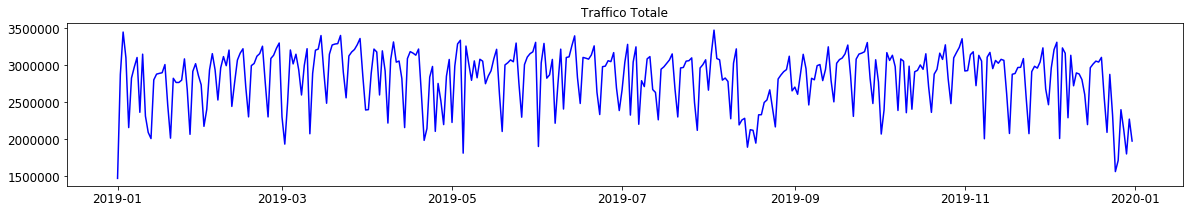

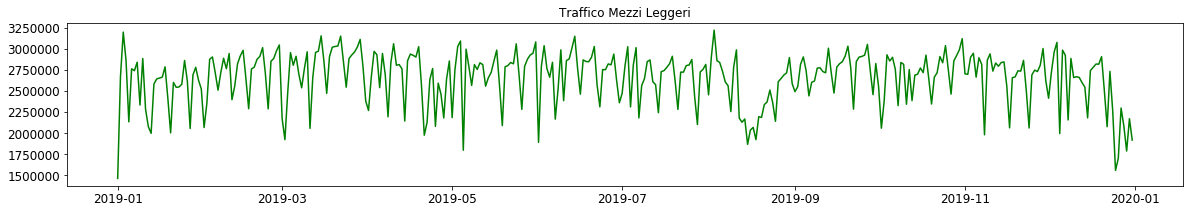

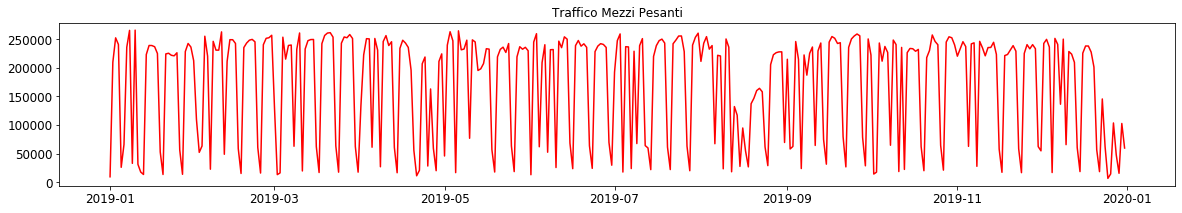

In [81]:
plt.figure(figsize = (20, 3))
plt.title('Traffico Totale')
plt.plot(data4viz_tot['Traffic'], color = "blue")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()

plt.figure(figsize = (20, 3))
plt.title('Traffico Mezzi Leggeri')
plt.plot(data4viz['Traffic'], color = "green")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()

plt.figure(figsize = (20, 3))
plt.title('Traffico Mezzi Pesanti')
plt.plot(data4viz_pesanti['Traffic'], color = "red")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Traffico totale durante i giorni feriali e quelli festivi

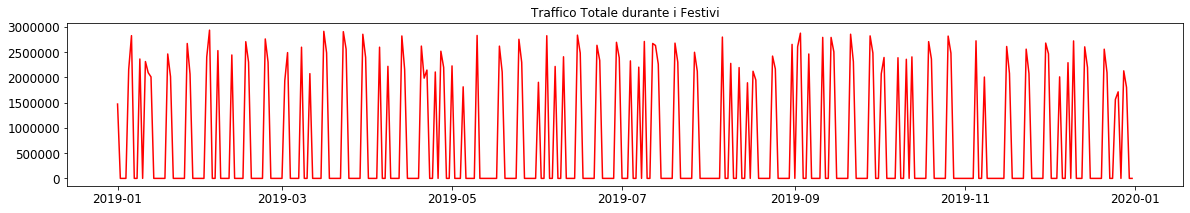

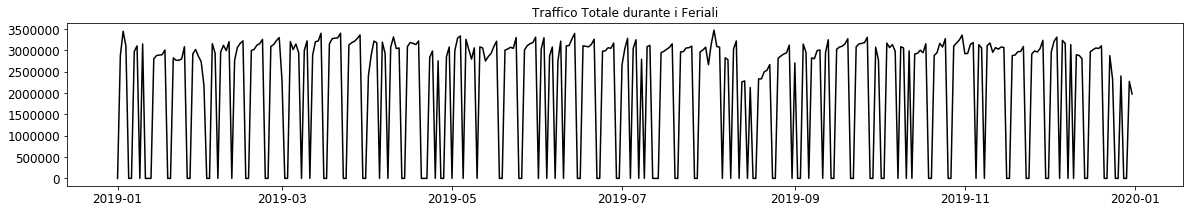

In [82]:
plt.figure(figsize = (20, 3))
plt.title('Traffico Totale durante i Festivi')
plt.plot(data4viz_festivi['Traffic'], color = "red")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()

plt.figure(figsize = (20, 3))
plt.title('Traffico Totale durante i Feriali')
plt.plot(data4viz_feriali['Traffic'], color = "black")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Traffico per giorno della settimana diviso per categoria di mezzi (pesanti vs leggeri) 

In [74]:
d_tot = {}
d_leg = {}
d_pes = {}

counter = 0
for index, dow in agg_by_day_of_week:
    somma_tot = dow['Transiti - Totale'].sum()
    somma_pesante = dow['Transiti - Pesanti'].sum()
    somma_leggero = dow['Transiti - Leggeri'].sum()
    if index == 1: index = 'Lunedi'
    if index == 2: index = 'Martedi'
    if index == 3: index = 'Mercoledi'
    if index == 4: index = 'Giovedi'
    if index == 5: index = 'Venerdi' 
    if index == 6: index = 'Sabato'
    if index == 7: index = 'Domenica'    
    d_tot[index] = somma_tot
    d_leg[index] = somma_leggero
    d_pes[index] = somma_pesante

In [75]:
d_leg

{'Lunedi': 129072494.0,
 'Martedi': 131847285.0,
 'Mercoledi': 131616936.0,
 'Giovedi': 131821388.0,
 'Venerdi': 137641350.0,
 'Sabato': 123434188.0,
 'Domenica': 105075080.0}

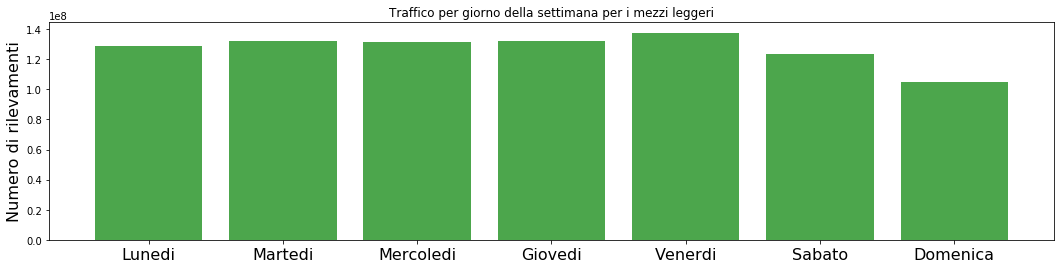

In [235]:
days_leg = tuple(d_leg.keys())
values_per_day_leg = list(d_leg.values())
y_pos = np.arange(len(days_leg))

plt.figure(figsize = (18, 4))
plt.bar(y_pos, values_per_day_leg, align='center', alpha=0.7, color = "green")
plt.xticks(y_pos, days_leg, fontsize=16)
plt.ylabel('Numero di rilevamenti', fontsize=16)
plt.title('Traffico per giorno della settimana per i mezzi leggeri')

plt.show()

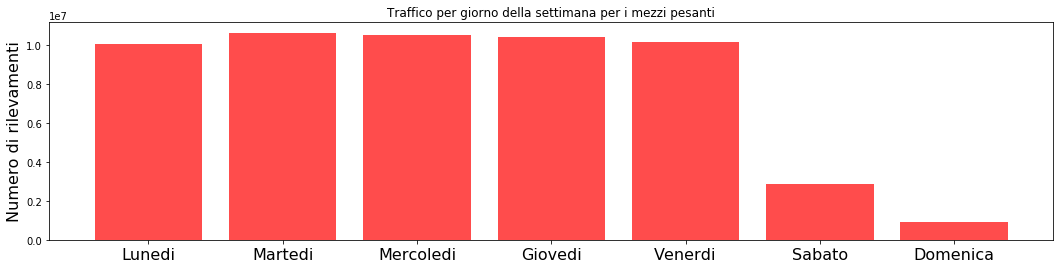

In [236]:
days_pes = tuple(d_pes.keys())
values_per_day_pes = list(d_pes.values())
y_pos = np.arange(len(days))

plt.figure(figsize = (18, 4))
plt.bar(y_pos, values_per_day_pes, align='center', alpha=0.7, color = "red")
plt.xticks(y_pos, days_pes, fontsize=16)
plt.ylabel('Numero di rilevamenti', fontsize=16)
plt.title('Traffico per giorno della settimana per i mezzi pesanti')
plt.show()

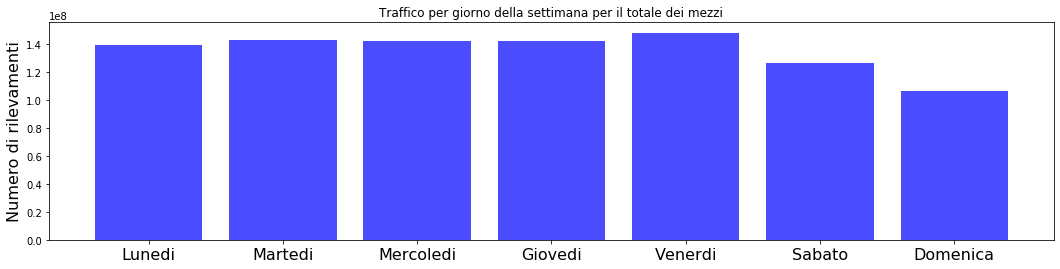

In [234]:
days_t = tuple(d_tot.keys())
values_per_day_t = list(d_tot.values())
y_pos = np.arange(len(days))

plt.figure(figsize = (18, 4))
plt.bar(y_pos, values_per_day_t, align='center', alpha=0.7, color = "blue")
plt.xticks(y_pos, days_t, fontsize=16)
plt.ylabel('Numero di rilevamenti', fontsize=16)
plt.title('Traffico per giorno della settimana per il totale dei mezzi')
plt.show()

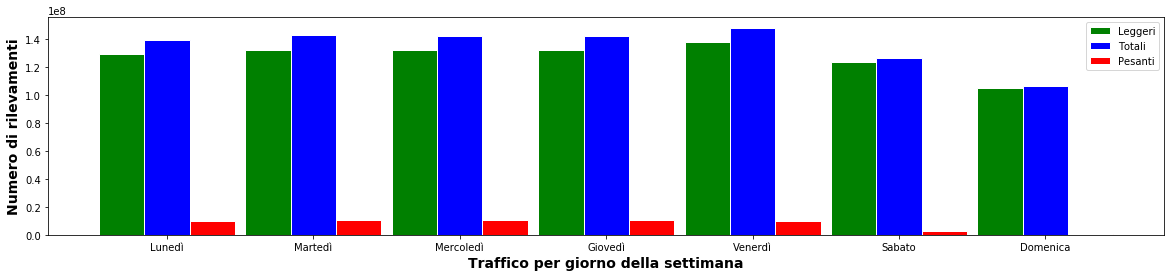

In [230]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.31
 
# set height of bar
bars1 = values_per_day_leg
bars2 =  values_per_day_t
bars3 = values_per_day_pes

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize = (20, 4))

# Make the plot
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Leggeri')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Totali')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Pesanti')
 
# Add xticks on the middle of the group bars
plt.xlabel('Traffico per giorno della settimana', fontweight='bold', fontsize=14)
plt.ylabel('Numero di rilevamenti', fontweight='bold', fontsize=14)
plt.xticks([r + barWidth for r in range(len(bars1))], 
           ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


### Mappa con delle postazioni con i placemark di colore diverso in base al traffico che rilevano

In [206]:
agg_by_postazione = data_post.groupby(by = ['Postazione'])
print('Postazioni ',len(agg_by_postazione))
dict2post = {}
for index, posta in agg_by_postazione: 
    #print(index, posta['Transiti - Totale'].sum())
    sum_rel = posta['Transiti - Totale'].sum()
    dict2post[index] = sum_rel
    
dict2post[187] = 0.0
dict2post[175] = 0.0
dict2post[345] = 0.0
dict2post[380] = 0.0
dict2post[454] = 0.0
dict2post[253] = 0.0
dict2post[501] = 0.0
dict2post[503] = 0.0
dict2post[141] = 0.0
dict2post[352] = 0.0
dict2post[650] = 0.0
dict2post[664] = 0.0

Postazioni  272


In [207]:
post_data_values = pd.DataFrame(list(dict2post.items()),columns = ['Postazione','Nr_passaggi'])
params = pd.DataFrame(post_data_values.describe())
media = params['Nr_passaggi'][1]
per75 = params['Nr_passaggi'][6]
max_ril = params['Nr_passaggi'][7]


In [212]:
geo_df = gpd.read_file('MTS/PostazioniSensoriWGS84.shp')
geo_df.head(2)
print(geo_df.shape)
m = folium.Map(location = [44.5011,11.3602], zoom_start=8)

for index, row in geo_df.iterrows():
    x = float(row['x'])
    y = float( row['y'])
    name = row['NAME']
    rilNum = dict2post[name]
    
        
    if rilNum < media:
        folium.Marker([y, x], popup='<i>Postazione '+str(name) +'  rileva traffico basso</i>', icon=folium.Icon(color='green')).add_to(m)
        
    if rilNum > media and rilNum < per75:
        folium.Marker([y, x], popup='<i>Postazione '+str(name) +'  rileva traffico moderato </i>', icon=folium.Icon(color='orange')).add_to(m)
        
    if rilNum > per75: 
        folium.Marker([y, x], popup='<i>Postazione '+str(name) +'rileva traffico alto </i>', icon=folium.Icon(color='red')).add_to(m)
        
display(m)

(282, 4)
